Here we will learn how to create a linear regression using python and numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def estimate_b0_b1(x, y):
    """Estimate coeficients for linear equation
    y = b1x + b0"""
    n = np.size(x)
    x_mean, y_mean = np.mean(x), np.mean(y)
    
    # get the sum of XY and XX
    sum_xy = np.sum((x - x_mean)*(y - y_mean))
    sum_xx = np.sum(np.sum((x - x_mean)**2))
    
    # get the coeficients 
    b1 = sum_xy / sum_xx
    b0 = y_mean - b1*x_mean
    
    return b0, b1

In [10]:
def plot_regression(x, y, b0, b1):
    """Plot scatter plot for the regression"""
    plt.scatter(x, y, color="g", marker="o", s=30)
    
    # plot predicted
    y_pred = b0 + b1*x
    plt.plot(x, y_pred, color='b')
    
    plt.xlabel('x independant')
    plt.ylabel('y independant')    
    plt.show()

The coeficients are: 
b0: 1.5    b1: 0.9


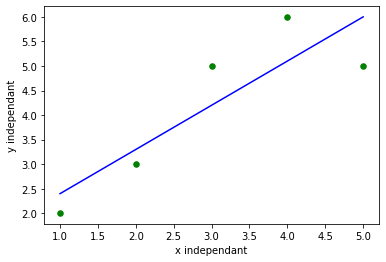

In [39]:
# get our dummy dataset
x = np.array([1,2,3,4,5])
y = np.array([2,3,5,6,5])

# get b0 and b1
b0, b1 = estimate_b0_b1(x, y)
print("The coeficients are: ")
print("b0: {}    b1: {}".format(b0, b1))

plot_regression(x, y, b0, b1)

# Now with sklearn

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [65]:
# check available datasets
# available_datasets = sns.get_dataset_names()
# print(available_datasets)
# use iris dataset
dataset = sns.load_dataset('iris')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


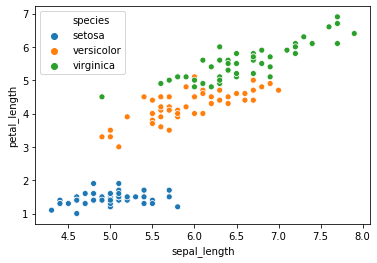

In [74]:
# take a look
sns.scatterplot(data=dataset, x='sepal_length', y='petal_length', hue='species')

To get a better model, I'm going to take just one species

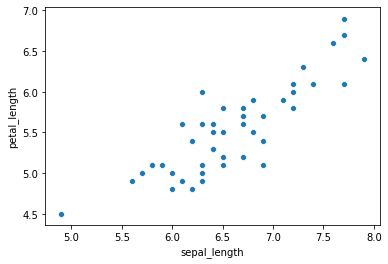

In [77]:
dataset = dataset[dataset.species == 'virginica']
sns.scatterplot(data=dataset, x='sepal_length', y='petal_length')

Divide our dataset into training and testing dataset and create the model

In [78]:
# create the datasets
x_train, x_test, y_train, y_test = train_test_split(dataset.sepal_length, dataset.petal_length)
# create the linear model
regression = LinearRegression()
regression.fit(x_train.values.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Use the model to predict 

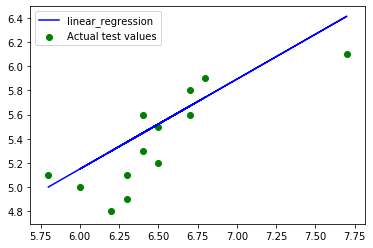

In [89]:
y_predicted = regression.predict(x_test.values.reshape(-1, 1))
# plot results to compare
plt.plot(x_test, y_predicted, label='linear_regression', color='b')
plt.scatter(x_test, y_test, label='Actual test values', color='g')
plt.legend()
plt.show()

## Seems that the model is working... but how well?

In [90]:
# sklearn will help us to score the model with a built in function
regression.score(x_test.values.reshape(-1, 1), y_test.values)

0.5610211539894558

is this a good result? Maybe not